# Computational Physics Blatt 03
Anne, Fabian und Asliddin 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import timeit

matplotlib.rcParams["figure.figsize"] = (10, 10)
%matplotlib inline

cmap = plt.get_cmap("viridis")
# Set some constants
T0 = 0
T_MAX = 100
H = 0.001
DIM = 3 # Number of dimensions, relevant for the indeces of y


def gravitation(delta_r, m1, m2, G=1):
    r_norm = np.linalg.norm(delta_r)
    return G * m1 * m2 * delta_r / r_norm**3


def graviWrap(t, y, m1=1, m2=1e-10, G=1):
    # Splitting the vector y into the four vectors r1, r2, p1, p2
    r1 = y[0:DIM]
    r2 = y[DIM : 2 * DIM]
    p1 = y[2 * DIM : 3 * DIM]
    p2 = y[3 * DIM : 4 * DIM]
    delta_r = r2 - r1
    p1_dot = gravitation(delta_r, m1, m2, G=G)
    p2_dot = -p1_dot
    r1_dot = p1 / m1
    r2_dot = p2 / m2
    return np.concatenate((r1_dot, r2_dot, p1_dot, p2_dot))

In [2]:
def rungeKutta4(
    f, y0, t0, h, t_max, **kwargs
):  # Generator for the recursive Rubnge-Kutta 4th order method.
    y = y0
    t_n = t0
    t_n1 = t_n + h  # in Latex: t_{n+1}
    t_n12 = t_n + h / 2  # in Latex: t_{n+1/2}
    while t_n < t_max:
        k1 = h * f(t_n, y, **kwargs)
        k2 = h * f(t_n12, y + 0.5 * k1, **kwargs)
        k3 = h * f(t_n12, y + 0.5 * k2, **kwargs)
        k4 = h * f(t_n1, y + k3, **kwargs)
        y = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t_n = t_n1
        t_n1 = t_n + h
        t_n12 = t_n + h / 2
        yield t_n, y

## a)

The gravitational Force is given by
\begin{align}
    \ddot{r}_\mathrm{i}m_\mathrm{i} &= -G\frac{m_\mathrm{i}m_\mathrm{j}}{\left|r_\mathrm{i}- r_\mathrm{j}\right|^3}(r_\mathrm{i}- r_\mathrm{j}) \\
    \Leftrightarrow \ddot{r}_\mathrm{i} &= -G\frac{m_\mathrm{j}}{\left|r_\mathrm{i}- r_\mathrm{j}\right|^3}(r_\mathrm{i}- r_\mathrm{j}) \\
\end{align}
By using $y = (r,p)^\mathrm{T}$ we can simplify this differential equation of rank 2 to two differential equations of rank 1
\begin{align}
y_\mathrm{i} &= \begin{pmatrix}
    r_\mathrm{i} \\
    p_\mathrm{i}
    \end{pmatrix} \\
\Rightarrow \dot{r}_\mathrm{i} &= \frac{p_\mathrm{i}}{m_\mathrm{i}} \\
\Rightarrow \dot{p_\mathrm{i}} &= -G\frac{m_\mathrm{j}}{\left|r_\mathrm{i}- r_\mathrm{j}\right|^3}(r_\mathrm{i}- r_\mathrm{j}) \\
\end{align}

Text(0.5, 1.0, 'Starting with to low velocity')

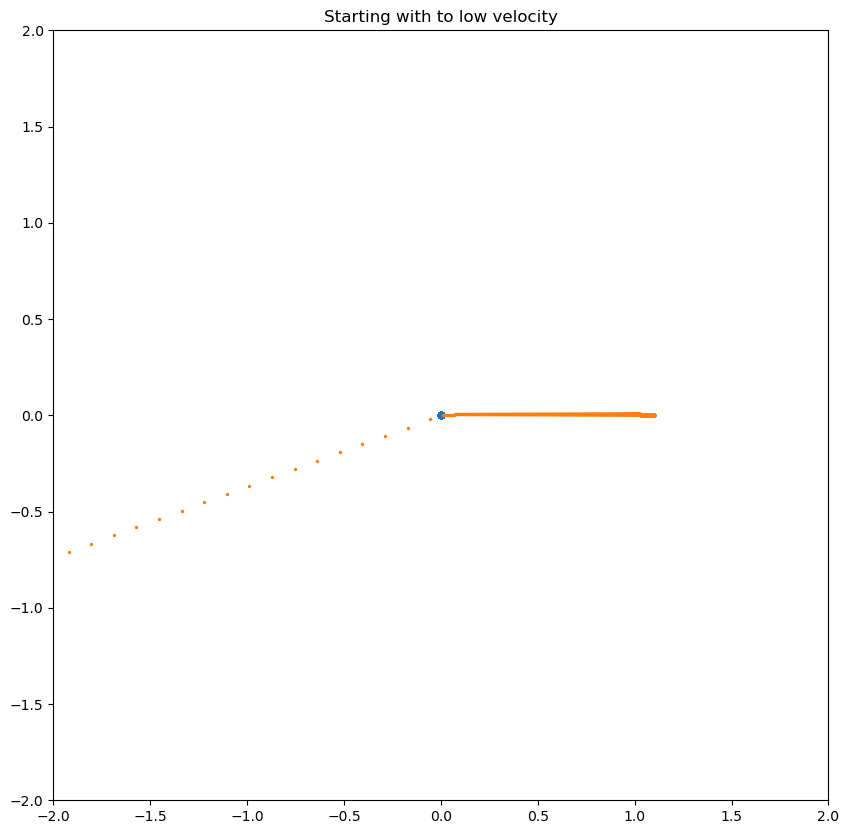

In [3]:
r0_Planet = np.array([0, 0, 0])
r0_RS = np.array([1.1, 0, 0])
p0_Planet = np.array([0, 0, 0])
p0_RS = np.array([0, 1e-12, 0])
m_Planet = 1
m_RS = 1e-10

y_0 = np.concatenate((r0_Planet, r0_RS, p0_Planet, p0_RS))
system = rungeKutta4(graviWrap, y_0, t0=T0, h=H, t_max=T_MAX, m1=m_Planet, m2=m_RS)
run1 = [(t, y) for (t, y) in system]
time, trajectory = zip(*run1)  # Unpacks the tuples of states into two lists
time = np.array(time)
trajectory = np.array(trajectory)
plt.scatter(trajectory[:, 0], trajectory[:, 1], s=20)
plt.scatter(trajectory[:, 3], trajectory[:, 4], s=2)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title("Starting with to low velocity")

Text(0.5, 1.0, 'Starting with correct velocity')

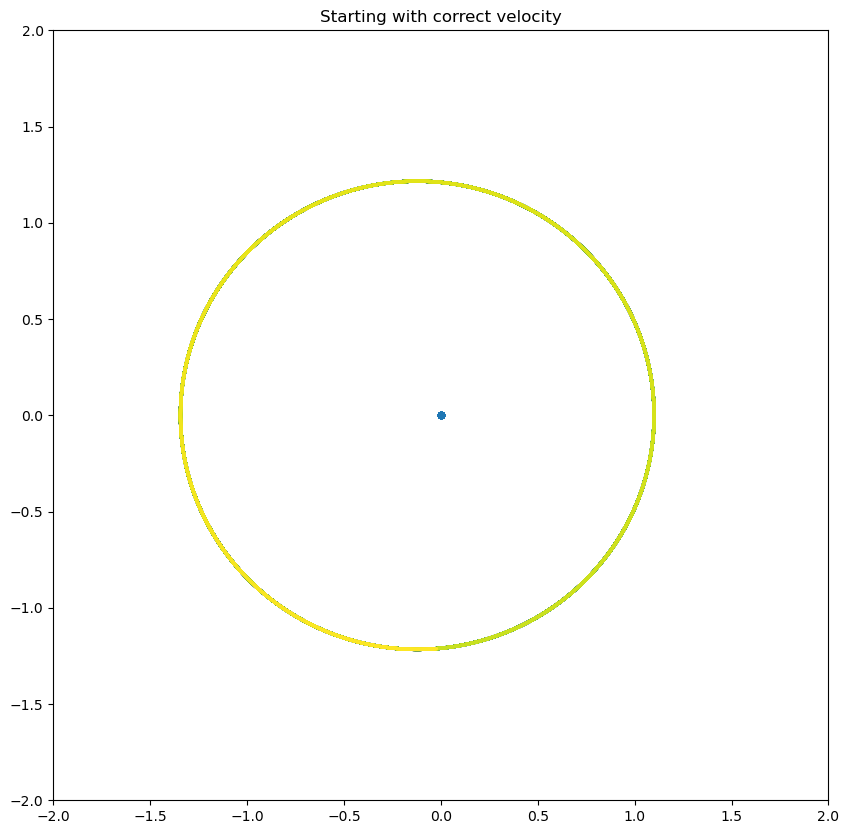

In [15]:
r0_Planet = np.array([0, 0, 0])
r0_RS = np.array([1.1, 0, 0])
p0_Planet = np.array([0, 0, 0])
p0_RS = np.array([0, 1e-10, 0])
m_Planet = 1
m_RS = 1e-10

y_0 = np.concatenate((r0_Planet, r0_RS, p0_Planet, p0_RS))
system = rungeKutta4(graviWrap, y_0, t0=T0, h=H, t_max=T_MAX, m1=m_Planet, m2=m_RS)
run2 = [(t, y) for (t, y) in system]
time, trajectory = zip(*run2)
time = np.array(time)
trajectory = np.array(trajectory)
colors = cmap(time / time[-1])
plt.scatter(trajectory[:, 0], trajectory[:, 1], s=20)
plt.scatter(trajectory[:, 3], trajectory[:, 4], s=2, c=colors)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title("Starting with correct velocity")

When starting with to little velocity, the space station crashes in the planet, as it should.

In this simulation, the station can pass thru the planet at extreme velocity.
Because our $h$ is to big for this rate of change, we miss the very important moments of big deceleration and the station escapes. 

## d)

In [5]:
def euler(f, y0, t0, h, t_max, **kwargs):
    y = y0
    t_n = t0
    t_n1 = t_n + h
    while t_n < t_max:
        y = y + h * f(t_n, y, **kwargs)
        t_n = t_n1
        t_n1 = t_n + h
        yield t_n, y

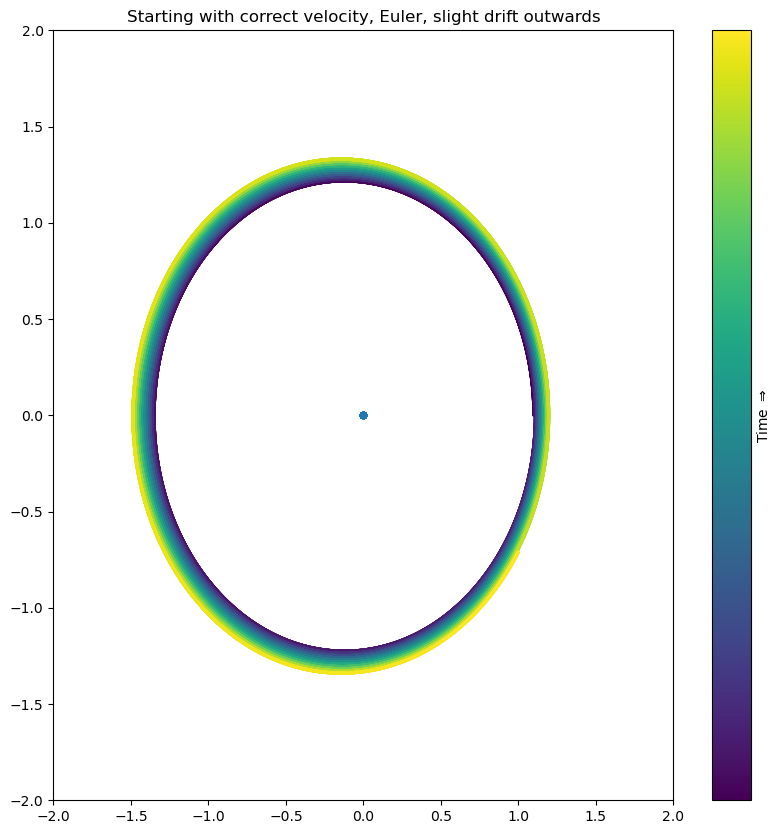

In [6]:
system = euler(graviWrap, y_0, t0=T0, h=H, t_max=T_MAX, m1=m_Planet, m2=m_RS)
eulerRun1 = [(t, y) for (t, y) in system]
time, trajectory = zip(*eulerRun1)
time = np.array(time)
trajectory = np.array(trajectory)
colors = cmap(time / time[-1])
plt.scatter(trajectory[:, 0], trajectory[:, 1], s=20)
trajPlot = plt.scatter(trajectory[:, 3], trajectory[:, 4], s=2, color=colors)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title("Starting with correct velocity, Euler, slight drift outwards")
# Make pretty colorbar
cbar = plt.colorbar(trajPlot)
cbar.set_label("Time $\Rightarrow$")
cbar.set_ticks([])

Using the $h$ from the Runge-Kutta method shows a slight drift of the station into space. So to compare the methods fairly, we need to decrease our step size.

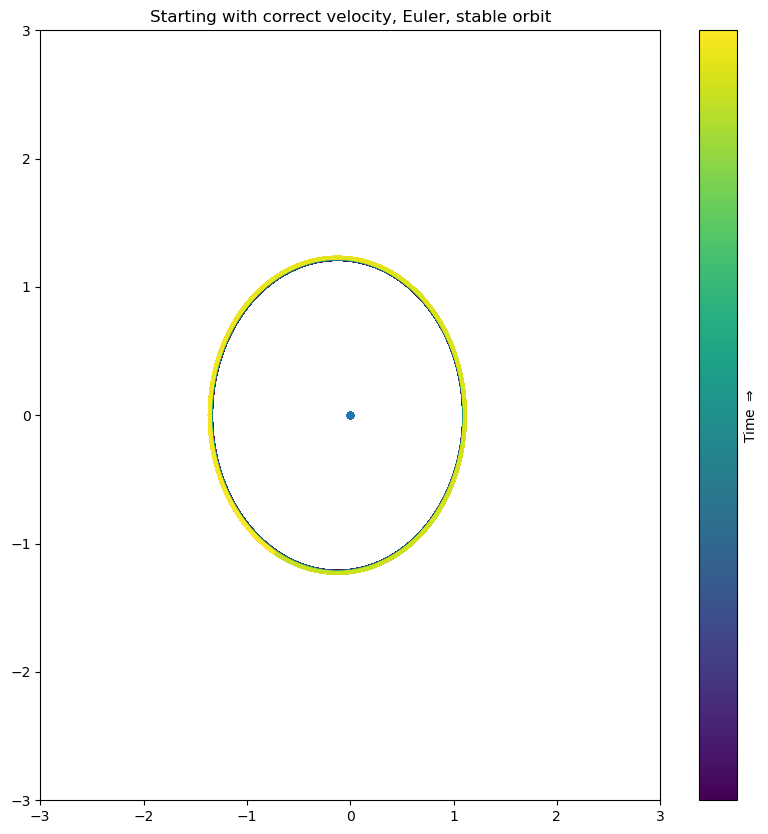

In [7]:
H_EULER = H * 0.1

system = euler(graviWrap, y_0, t0=T0, h=H_EULER, t_max=T_MAX, m1=m_Planet, m2=m_RS)
eulerRun2 = [(t, y) for (t, y) in system]
time, trajectory = zip(*eulerRun2)
time = np.array(time)
trajectory = np.array(trajectory)
colors = cmap(time / time[-1])
plt.scatter(trajectory[:, 0], trajectory[:, 1], s=20)
trajPlot = plt.scatter(trajectory[:, 3], trajectory[:, 4], s=2, color=colors)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title("Starting with correct velocity, Euler, stable orbit")
# Make pretty colorbar
cbar = plt.colorbar(trajPlot)
cbar.set_label("Time $\Rightarrow$")
cbar.set_ticks([])

In [8]:
%%timeit # WARNING: This cell will take a long time to run
system = euler(graviWrap, y_0, t0=T0, h=H_EULER, t_max=T_MAX, m1=m_Planet, m2=m_RS)
eulerRun = [(t, y) for (t, y) in system]
time, trajectory = zip(*eulerRun)
time = np.array(time)
trajectory = np.array(trajectory)


9.63 s ± 57.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%%timeit # WARNING: This cell will take a long time to run
system = rungeKutta4(graviWrap, y_0, t0=T0, h=H, t_max=T_MAX, m1=m_Planet, m2=m_RS)
rkRun = [(t, y) for (t, y) in system]
time, trajectory = zip(*rkRun)
time = np.array(time)
trajectory = np.array(trajectory)

4.33 s ± 57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


With the adjusted $h$ for the euler method, it takes about double as long to sun the simulation, 9.81s against 4.43s for the RungeKutta method on my maschine.

## e)

We can just use our original run, so we use $N=t_\mathrm{max}/h = 100\,000$ steps, invert all momentum an do another $100\,000$ steps

In [18]:
return_point = np.copy(run2[1][-1])  # Ensure we dont modify the original array
return_point[2 * DIM : 4 * DIM] *= -1  # Invert the momentum of the system

system = rungeKutta4(
    graviWrap, return_point, t0=T_MAX, h=H, t_max=2 * T_MAX, m1=m_Planet, m2=m_RS
)
invertRun = [(t, y) for (t, y) in system]
print(
    f"The system returns to the initial state: {np.allclose(invertRun[1][-1], y_0)}"
)  # Check if the system returns to the initial state
print(f"Difference in y vector: {invertRun[1][-1] - y_0}")

The system returns to the initial state: True
Difference in y vector: [ 9.42935301e-31 -4.85996384e-34  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.78653235e-29 -1.67632942e-30
  0.00000000e+00 -3.78653235e-29 -2.00000000e-10 -0.00000000e+00]
